# Vegetation encroachment analysis using LiDAR data

- 🥠 Deep Learning
- ☁️ Point Cloud Classification
- 🛰️ Remote Sensing
- 🌳 Vegetation Management

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Area-of-interest" data-toc-modified-id="Area-of-interest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Area of interest</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Classification-of-point-clouds" data-toc-modified-id="Classification-of-point-clouds-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification of point clouds</a></span></li><li><span><a href="#Visualization-of-point-cloud-classification-results-in-ArcGIS-Pro" data-toc-modified-id="Visualization-of-point-cloud-classification-results-in-ArcGIS-Pro-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization of point cloud classification results in ArcGIS Pro</a></span></li><li><span><a href="#Post-processing-of-classified-point-clouds-in-ArcGIS-Pro" data-toc-modified-id="Post-processing-of-classified-point-clouds-in-ArcGIS-Pro-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Post-processing of classified point clouds in ArcGIS Pro</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Introduction

When it comes to electrical power distribution via transmission or distribution wires, a lot of maintenance costs for these powerline networks, are due to vegetation management around the powerlines <i>(as shown in figure 1)</i>. Vegetation management is very crucial, as uncontrolled vegetation encroachments can very easily lead to forest fires, power outages during the storm, etc.

Identifying these maintenance spots that will need trimming or vegetation management is a time taking process and many times, a manual survey is done or the survey is partially-assisted via remote sensing data. Companies have to spend millions on vegetation encroachment management <a href="#References">[1]</a>. 


<p align="center">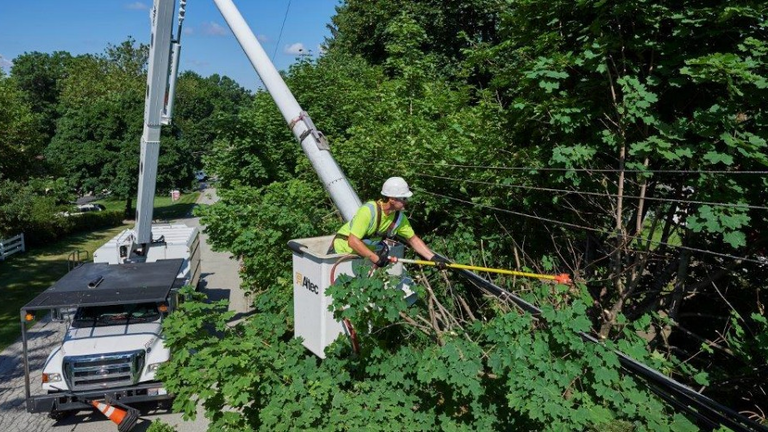</p>

<center>Figure 1. Vegetation management around powerlines <a href="#References">[1]</a>.</center>

With the recent advancements in deep learning for remotely sensed data, this problem can be solved much faster and that too 'at scale'. There are 'deep learning' assisted workflows for this, using both satellite/drone imagery and 3D data. In this sample notebook, vegetation encroachment analysis is performed on 3D data <i>(LiDAR point clouds)</i> with the help of deep learning and advanced GIS tools.

Another <a href="https://developers.arcgis.com/python/sample-notebooks/detection-of-electric-utility-features-and-vegetation-encroachments-from-satellite-images-using-deep-learning/" target="_blank">sample notebook</a> for vegetation encroachment analysis on satellite imagery is also available in the 'sample notebook section' on the website.




Further details on the PointCNN implementation in the API (working principle, architecture, best practices, etc.), can be found in the <a href="https://developers.arcgis.com/python/guide/point-cloud-segmentation-using-pointcnn" target="_blank">PointCNN guide</a>, along with instructions on how to set up the Python environment. Additional sample notebooks related to PointCNN can be found in the <a href="https://developers.arcgis.com/python/sample-notebooks/" target="_blank">sample notebook section</a> on the website. Documentemtation for point cloud classification using 3D deep learning tools in ArcGIS Pro, can be found <a href="https://pro.arcgis.com/en/pro-app/latest/help/data/las-dataset/introduction-to-deep-learning-and-point-clouds.htm" target="_blank">here</a>.

_**Objectives:**_

<ol style="list-style-type:upper-roman">
<li>Classify points representing buildings, grounds, vegetation, distribution wires, and poles using ESRI's pre-trained deep learning models and GP tools  in ArcGIS Pro. </li>
    
<li>Then, advanced GIS analysis in ArcGIS Pro is used to identify locations with vegetation encroachment, that will need trimming/management of vegetation.  </li>
<br>


## Area of interest

For this sample notebook, a small area located in Australia is considered as the test data to perform vegetation encroachment <i>(as shown in figure 2)</i>. The data used here, is unclassified airborne LiDAR data.

<p align="center">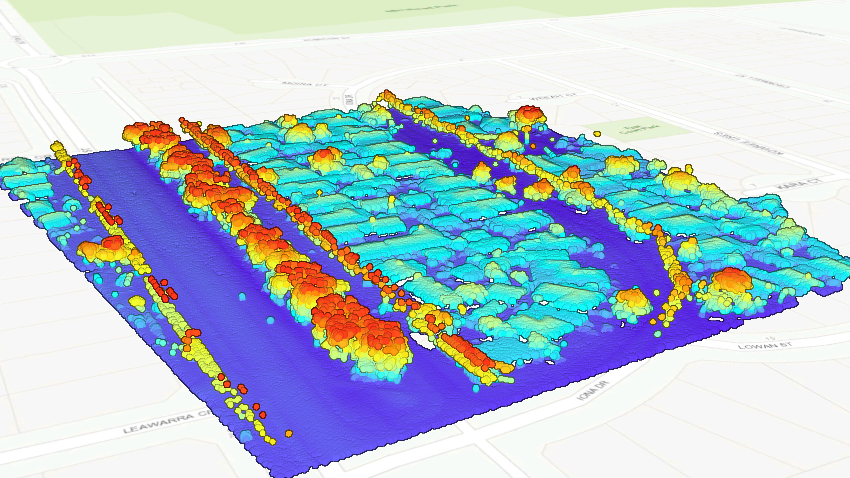</p>

<center>Figure 2. Unclassified LiDAR sample data.</center>

_**Workflow overview:**_



- First, <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-ground.htm" target="_blank">Classify LAS Ground</a> and <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-building.htm" target="_blank">Classify LAS Building</a> tools are used for classifying ground and building points.


- ESRI's <a href="https://arcg.is/1PCH5i0" target="_blank"> Power Line Classification</a> pre-trained model is used to classify points that represent distribution wires and poles while preserving points belonging to building or ground classes.


- ESRI's <a href="https://arcg.is/1nyfPz" target="_blank"> Tree Point Classification</a> pre-trained model is used to classify points that represent high vegetation <i>(trees)</i> while using `class preservation` for points belonging to distribution wires, buildings poles, and ground classes.


- After the classification  of points for all the objects of interest, geoprocessing tools like <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/minimum-bounding-volume.htm" target="_blank"> Minimum Bounding Volume</a>, <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/locate-las-points-by-proximity.htm" target="_blank"> Locate LAS Points By Proximity</a>, <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/intersect-3d-3d-analyst-.htm" target="_blank"> Intersect 3D</a>, etc. a model builder workflow is created to find vegetation encroachment spots.


- The approach used in the GIS workflow for this notebook is based on post-processing of vector data. If needed, a raster-based approach can also be explored using the <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/cut-fill.htm" target="_blank"> Cut Fill</a> tool.




## Data preparation

_**Imports:**_

In [ ]:
from arcgis.gis import GIS
gis = GIS()

**Note:** The data used in this sample notebook can be downloaded from <a href="https://arcg.is/1z1OST"  target="_blank">here</a>, in a zip file format. It has the 'test data', which is used for inferencing.

In [5]:
test_data = gis.content.get('4a51c205d9af43f0bedec0a9c337c538')
test_data

<Item title:"Vegetation_encroachment_analysis_using_lidar_data" type:Image Collection owner:api_data_owner>

After downloading the data, points representing the objects of interest are classified using ArcGIS Pro.

## Classification of point clouds

_**Using traditional algorithms:**_

The workflow starts with creating a LAS dataset from the downloaded sample data using <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/create-las-dataset.htm" target="_blank">Create LAS Dataset</a> tool.

Then, ground points are classified using <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-ground.htm" target="_blank">Classify LAS Ground</a> tool <i>(as shown in figure 3)</i>.

<p align="center">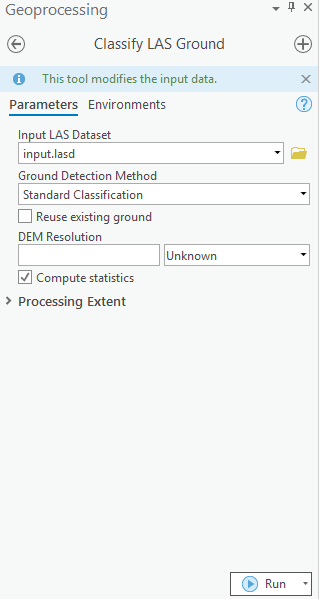</p>
<center>Figure 3. Classifying ground points using <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-ground.htm" target="_blank">Classify LAS Ground</a> tool.</center>

After ground points are classified, building points are also classified using <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-building.htm" target="_blank">Classify LAS Building</a> tool, where both above and below roof points are also classified  as building class <i>(as shown in figure 4)</i>.

<p align="center">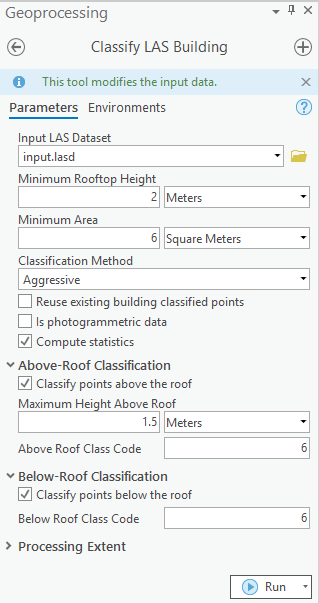</p>
<center>Figure 4. Classifying building points using <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-las-building.htm" target="_blank">Classify LAS Building</a> tool.</center>

_**Using deep learning:**_

For inferencing using deep learning models, <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/classify-point-cloud-using-trained-model.htm" target="_blank">Classify Points Using Trained Model</a> tool, in the <a href="https://pro.arcgis.com/en/pro-app/latest/tool-reference/3d-analyst/an-overview-of-the-3d-analyst-toolbox.htm" target="_blank">3D Analyst extension</a>, available from ArcGIS Pro 2.8 onwards can be used.


For classification of distribution wires wires and poles, ESRI's <a href="https://arcg.is/1PCH5i0" target="_blank"> Power Line Classification</a> pre-trained model is used <i>(as shown in figure 5)</i>. Here, `class preservation` is used for building and ground points.

In [11]:
power_line_classification = gis.content.get('6ce6dae2d62c4037afc3a3abd19afb11')
power_line_classification

<Item title:"Power Line Classification" type:Deep Learning Package owner:esri_analytics>

<p align="center">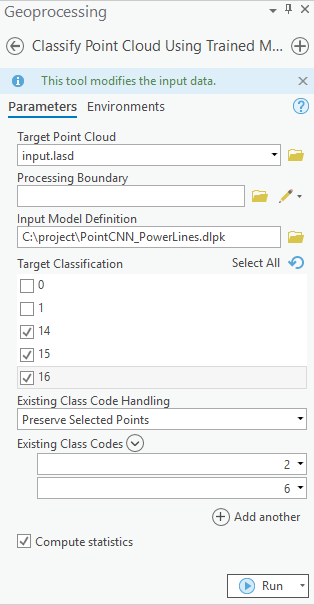</p>
<center>Figure 5. Classifying points representing distribution wires and poles using ESRI's <a href="https://arcg.is/1PCH5i0" target="_blank">Power Line Classification</a> pre-trained model.</center>

For classification of high vegetation/trees, ESRI's <a href="https://arcg.is/1nyfPz" target="_blank"> Tree Point Classification</a> pre-trained model is used <i>(as shown in figure 6)</i>. Here, `class preservation` is used for building, distribution wires, poles, and ground points.

In [12]:
tree_point_classification = gis.content.get('58d77b24469d4f30b5f68973deb65599')
tree_point_classification

<Item title:"Tree Point Classification" type:Deep Learning Package owner:esri_analytics>

<p align="center">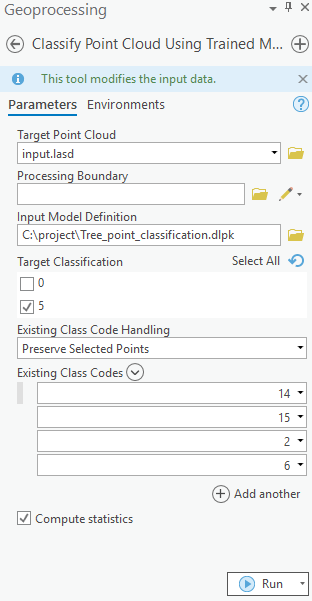</p>

<center>Figure 6. Classifying points representing high vegetation using ESRI's <a href="https://arcg.is/1nyfPz" target="_blank">Tree Point Classification</a> pre-trained model.</center>

## Visualization of point cloud classification results in ArcGIS Pro

Now, all the points representing the objects of interest are classified in the test data <i>(as shown in figure 7)</i>. After visualization of results, advanced GIS analysis is performed to identify locations of vegetation encroachments.

<p align="center">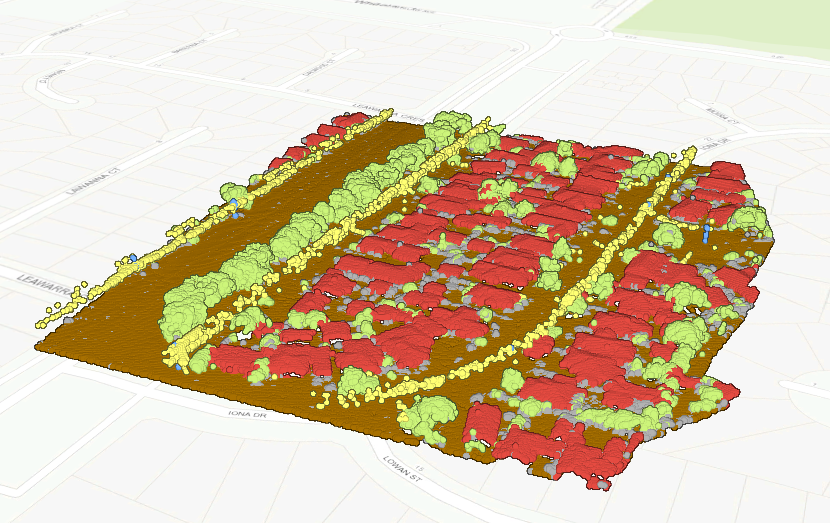</p>
<center>Figure 7. Sample data with classified points of objects of interest.</center>

## Post-processing of classified point clouds in ArcGIS Pro

The classified point cloud is first converted to vector data, then with the help of various geoprocessing tools, vegetation encroachment spots are identified. A model builder workflow is created, to process the data <i>(as shown in figure 8)</i>.

<p align="center">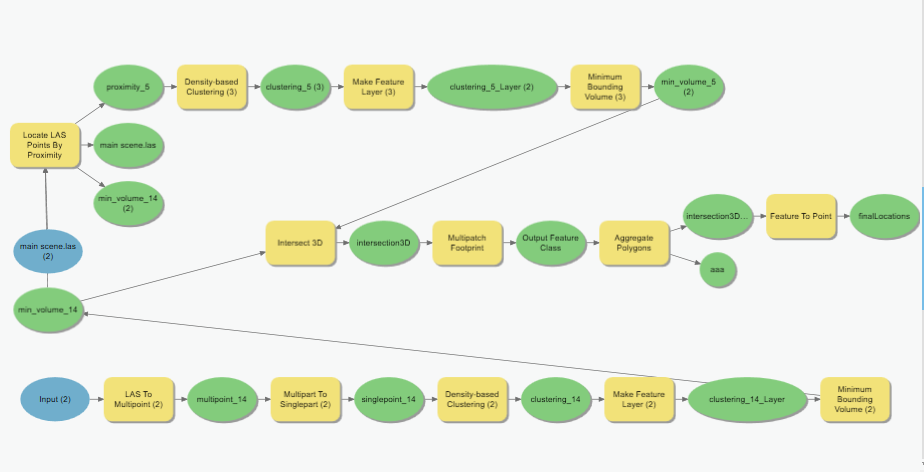</p>
<center>Figure 8. Model builder workflow for vegetation encroachment analysis in ArcGIS Pro.</center>

<i> This <a href="https://arcg.is/14T5TX" target="_blank">web scene</a>  has the final outputs related to the illustrated sample data in this notebook.</i>

In [15]:
results = gis.content.get('f703679ff01a41f196e99cf271494b2a')
results

<Item title:"Vegetation  Encroachment" type:Web Scene owner:vraj_deldev>

## Conclusion

This notebook has walked us through the workflow for vegetation encroachment analysis using ESRI's pre-trained models, covering both the deep learning and advanced GIS workflows. The GIS approach used is this notebook is based on post-processing of vector data. The tool paramters in model builder might need fine-tuning for other datasets.

## References

- Pennsylvania Power to Trim 1,100 Miles of Power Lines. (2019, May). T&D World Magazine. https://www.tdworld.com/vegetation-management/article/20972582/pennsylvania-power-to-trim-1100-miles-of-power-lines

